## Read the vertices and faces of triangles of 3D object


In [4]:
import numpy as np

In [5]:
#Reference: https://stackoverflow.com/questions/59535205/plotly-mesh3d-plot-from-a-wavefront-obj-file
def obj_data_to_mesh3d(odata):
    # odata is the string read from an obj file
    vertices = []
    faces = []
    lines = odata.splitlines()

    for line in lines:
        slist = line.split()
        if slist:
            if slist[0] == 'v':
                vertex = np.array(slist[1:], dtype=float)
                vertices.append(vertex)
            elif slist[0] == 'f':
                face = []
                for k in range(1, len(slist)):
                    face.append([int(s) for s in slist[k].replace('//','/').split('/')])
                if len(face) > 3: # triangulate the n-polyonal face, n>3
                    faces.extend([[face[0][0]-1, face[k][0]-1, face[k+1][0]-1] for k in range(1, len(face)-1)])
                else:
                    faces.append([face[j][0]-1 for j in range(len(face))])
            else: pass


    return np.array(vertices), np.array(faces)

In [7]:
with open("D:\IIIY Spring\EEN-682\Course Project\python-code\cube.obj") as data:
  odata = data.read()
  (vertices, faces) = obj_data_to_mesh3d(odata)

#print(odata)

In [8]:
vertices

array([[ 1.      , -1.      , -1.      ],
       [ 1.      , -1.      ,  1.      ],
       [-1.      , -1.      ,  1.      ],
       [-1.      , -1.      , -1.      ],
       [ 1.      ,  1.      , -0.999999],
       [ 0.999999,  1.      ,  1.000001],
       [-1.      ,  1.      ,  1.      ],
       [-1.      ,  1.      , -1.      ]])

In [ ]:
vertices[0] = [15,  3, 1]
vertices[1] =  [ 5,  8, 1]
vertices[2] =  [10, 15, 1]

In [9]:
faces

array([[1, 2, 3],
       [7, 6, 5],
       [4, 5, 1],
       [5, 6, 2],
       [2, 6, 7],
       [0, 3, 7],
       [0, 1, 3],
       [4, 7, 5],
       [0, 4, 1],
       [1, 5, 2],
       [3, 2, 7],
       [4, 0, 7]])

In [10]:
for face in faces:
  tri = np.array([vertices[face[0]],vertices[face[1]], vertices[face[2]]])
  tri = tri[tri[:, 1].argsort()]
  print(tri) 

[[ 1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1. -1.]]
[[-1.        1.       -1.      ]
 [-1.        1.        1.      ]
 [ 0.999999  1.        1.000001]]
[[ 1.       -1.        1.      ]
 [ 1.        1.       -0.999999]
 [ 0.999999  1.        1.000001]]
[[-1.       -1.        1.      ]
 [ 0.999999  1.        1.000001]
 [-1.        1.        1.      ]]
[[-1. -1.  1.]
 [-1.  1.  1.]
 [-1.  1. -1.]]
[[ 1. -1. -1.]
 [-1. -1. -1.]
 [-1.  1. -1.]]
[[ 1. -1. -1.]
 [ 1. -1.  1.]
 [-1. -1. -1.]]
[[ 1.        1.       -0.999999]
 [-1.        1.       -1.      ]
 [ 0.999999  1.        1.000001]]
[[ 1.       -1.       -1.      ]
 [ 1.       -1.        1.      ]
 [ 1.        1.       -0.999999]]
[[ 1.       -1.        1.      ]
 [-1.       -1.        1.      ]
 [ 0.999999  1.        1.000001]]
[[-1. -1. -1.]
 [-1. -1.  1.]
 [-1.  1. -1.]]
[[ 1.       -1.       -1.      ]
 [ 1.        1.       -0.999999]
 [-1.        1.       -1.      ]]


In [11]:
cord = -20
bits = 8
if cord < 0:
      print(hex((1 << bits) + cord))
else:
      print(hex(cord << bits))

0xec


In [ ]:
val = -94
nbits = 16
'{:02x}'.format(val & ((1 << nbits)-1))

'ffa2'

In [ ]:
nbits = 16
f = open("vertices.hex", "w")

bits = 16
# vertices = np.array([[1,2,3],
#      [4,5,6],
#      [7,8,9]])
vertice_hex = ''
for vertice in vertices :
  #print(vertice)

  cord_hex = ''
  for cord in vertice:

    num_int = (int(cord*100))
    num_hex = '{:02x}'.format(num_int & ((1 << nbits)-1))

    #cord_hex = cord_hex + (str(num_hex) + ' ')
    #print(cord_hex)
    #vertice_hex = vertice_hex + cord_hex + '\n'
  #print(vertice_hex)
    f.write(num_hex+'\n')

f.close()


In [ ]:
cord = vertices[0][0]
integer_part = (int(cord))
upper_hex = '{:02x}'.format(integer_part & ((1 << bits)-1))
decimal_part = abs(cord - int(cord))
x1 = hex(int(decimal_part *100))[2:]
lower_hex = x1
lower_hex

'0'

In [ ]:
f = open("faces.hex", "w")

bits = 16
face_hex = ''
for face in faces :

  vert_hex = ''

  for vert in face:
    v_hex = '{:04x}'.format(vert & ((1 << bits)-1))
    vert_hex =  vert_hex + (str(v_hex) + ' ')
    #print(cord_hex)
  face_hex = face_hex + vert_hex + '\n'
  #print(vertice_hex)

f.write(face_hex)

f.close()

In [ ]:
hex(faces[0,0])

'0x1'

In [ ]:
line = odata.splitlines()
line[0].split()

['#', 'Blender', 'v2.76', '(sub', '0)', 'OBJ', 'File:', "''"]

In [ ]:
vertices.shape

(8, 3)

In [ ]:
faces.shape

(12, 3)

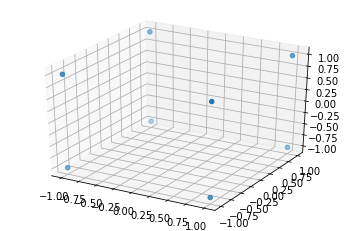

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2])
plt.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(x=vertices[:,0], y=vertices[:,1], z=vertices[:,2],
                                   mode='markers')])
fig.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=[go.Mesh3d(
  x=vertices[:,0], y=vertices[:,1], z=vertices[:,2], i=faces[:,0], j=faces[:,1], k=faces[:,2], color='green', opacity=0.20)])
  
fig.show()

## Linear transformation

If x key is pressed, then the model will translate to positive x axis. And if shift+x key is pressed, then it will translate in negative x axis direction.

Similar transformation is applied on y and z axis using y and z keys.

In [ ]:
new_vertices = vertices
new_vertices[:,0] = new_vertices[:,0]+0.5

fig = go.Figure(data=[go.Mesh3d(
  x=new_vertices[:,0], y=new_vertices[:,1], z=new_vertices[:,2], i=faces[:,0], j=faces[:,1], k=faces[:,2], color='green', opacity=0.20)])
  
fig.show()

In [ ]:
np.sin(2*np.pi/3)

0.8660254037844387

## Rotation Transformation

In [ ]:
rot_vertices = np.empty(vertices.shape)

alpha = theta_x   = np.pi/6
beta = theta_y    = 0
gamma = theta_z   = 0

x_rot_matrix = [[1,0,0],
                [0,np.cos(theta_x),-1*np.sin(theta_x)],
                [0, np.sin(theta_x), np.cos(theta_x)]]

y_rot_matrix = [[np.cos(theta_y),0,np.sin(theta_y)],
                [0,1,0],
                [-1*np.sin(theta_y),0, np.cos(theta_y)]]

z_rot_matrix = [[np.cos(theta_z),-1*np.sin(theta_z),0],
                [np.sin(theta_z),np.cos(theta_z),0],
                [0, 0, 1]]

from numpy import cos,sin
#Eulers angles
#Reference: https://en.wikipedia.org/wiki/Rotation_matrix

rot_matrix = [[ cos(beta)*cos(gamma)  ,   sin(alpha)*sin(beta)*cos(gamma)-cos(alpha)*sin(gamma) ,   cos(alpha)*sin(beta)*cos(gamma)+sin(alpha)*sin(gamma)],
              [cos(beta)*sin(gamma)   ,   sin(alpha)*sin(beta)*sin(gamma)+cos(alpha)*cos(gamma) ,   cos(alpha)*sin(beta)*sin(gamma)-sin(alpha)*cos(gamma)],
              [-1*sin(beta)           ,   sin(alpha)*cos(beta)                                  ,   cos(alpha)*cos(beta)                                 ]]

for vertice, i in zip(vertices, range(vertices.shape[0])):
  rot_vertices[i] = (np.dot(vertice,rot_matrix))



fig = go.Figure(data=[go.Mesh3d(
  x=rot_vertices[:,0], y=rot_vertices[:,1], z=rot_vertices[:,2], i=faces[:,0], j=faces[:,1], k=faces[:,2], color='green', opacity=0.20)])
  
fig.show()

In [ ]:
import numpy as np
x1 = 25
y1 = 26
z1 = 153
vertice = [x1, y1, z1]
alpha = theta_x   = np.pi/6
beta = theta_y    = 0
gamma = theta_z   = 0

from numpy import cos,sin
rot_matrix = [[ cos(beta)*cos(gamma)  ,   sin(alpha)*sin(beta)*cos(gamma)-cos(alpha)*sin(gamma) ,   cos(alpha)*sin(beta)*cos(gamma)+sin(alpha)*sin(gamma)],
              [cos(beta)*sin(gamma)   ,   sin(alpha)*sin(beta)*sin(gamma)+cos(alpha)*cos(gamma) ,   cos(alpha)*sin(beta)*sin(gamma)-sin(alpha)*cos(gamma)],
              [-1*sin(beta)           ,   sin(alpha)*cos(beta)                                  ,   cos(alpha)*cos(beta)                                 ]]


rot_vertices = (np.dot(vertice,rot_matrix))
rot_vertices

array([ 25.        ,  99.0166605 , 119.50188678])

In [ ]:
 cos(alpha)*cos(beta)*z1

0.762102355330306

In [ ]:
(cos(alpha)*sin(beta)*sin(gamma)-sin(alpha)*cos(gamma))*y1

-0.19499999999999998

In [ ]:
rot_vertices[0]


array([-0.442557  ,  0.78900356,  0.56660026])

In [ ]:
vertices[0]

array([-0.442557,  0.399997,  0.885192])

In [ ]:
cos(np.pi)

-1.0

In [ ]:
import numpy as np
x = np.array([1,2,3])
y = np.array([[1,2,3],
     [4,5,6],
     [7,8,9]])

In [ ]:
np.dot(x,y)

array([30, 36, 42])